<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Toronto-Neighbourhoods" data-toc-modified-id="Toronto-Neighbourhoods-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Toronto Neighbourhoods</a></span><ul class="toc-item"><li><span><a href="#Toronto-Neighbourhoods-Dataframe" data-toc-modified-id="Toronto-Neighbourhoods-Dataframe-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Toronto Neighbourhoods Dataframe</a></span></li><li><span><a href="#Coordinates-of-each-neighbourhood" data-toc-modified-id="Coordinates-of-each-neighbourhood-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Coordinates of each neighbourhood</a></span></li><li><span><a href="#Explore-&amp;-Cluster-the-Neighbourhoods-in-Toronto" data-toc-modified-id="Explore-&amp;-Cluster-the-Neighbourhoods-in-Toronto-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Explore &amp; Cluster the Neighbourhoods in Toronto</a></span><ul class="toc-item"><li><span><a href="#Explore-the-Neighbourhoods-in-Toronto" data-toc-modified-id="Explore-the-Neighbourhoods-in-Toronto-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Explore the Neighbourhoods in Toronto</a></span><ul class="toc-item"><li><span><a href="#Restaurants" data-toc-modified-id="Restaurants-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Restaurants</a></span></li><li><span><a href="#Gyms" data-toc-modified-id="Gyms-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Gyms</a></span></li><li><span><a href="#Parks" data-toc-modified-id="Parks-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>Parks</a></span></li><li><span><a href="#Markets" data-toc-modified-id="Markets-1.3.1.4"><span class="toc-item-num">1.3.1.4&nbsp;&nbsp;</span>Markets</a></span></li><li><span><a href="#Schools" data-toc-modified-id="Schools-1.3.1.5"><span class="toc-item-num">1.3.1.5&nbsp;&nbsp;</span>Schools</a></span></li><li><span><a href="#Cafes" data-toc-modified-id="Cafes-1.3.1.6"><span class="toc-item-num">1.3.1.6&nbsp;&nbsp;</span>Cafes</a></span></li></ul></li><li><span><a href="#Clustering-the-neighbourhoods" data-toc-modified-id="Clustering-the-neighbourhoods-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Clustering the neighbourhoods</a></span></li></ul></li></ul></li></ul></div>

# Toronto Neighbourhoods

## Toronto Neighbourhoods Dataframe

Import required libraries.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

import seaborn as sns
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
import numpy as np

import random 

from sklearn.cluster import KMeans

The wikipedia page with the neighbourhoods data was bugus so I looked for an altenative.

In [2]:
#url of the webpage
url = 'http://zims-en.kiwix.campusafrica.gos.orange.com/wikipedia_en_all_nopic/A/List_of_postal_codes_of_Canada:_M'

Get the html code.

In [3]:
html_text = requests.get(url).text

In [4]:
#Instantiate a Beautiful Soup contuctor
soup = BeautifulSoup(html_text,'lxml')

In [175]:
tables = soup.find('table')

In [176]:
#DataFrame witht the neighborhoods of Toronto
toronto_neigh = pd.read_html(str(tables), flavor = 'bs4')[0]

In [177]:
toronto_neigh.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [178]:
toronto_neigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Postcode       287 non-null    object
 1   Borough        287 non-null    object
 2   Neighbourhood  287 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [179]:
toronto_neigh.shape

(288, 3)

The dataframe has 288 rows and 3 columns.

In [180]:
toronto_neigh['Borough'].value_counts()

Not assigned        77
Etobicoke           44
North York          38
Downtown Toronto    37
Scarborough         37
Central Toronto     17
West Toronto        13
York                 9
East Toronto         7
East York            6
Queen's Park         1
Mississauga          1
Name: Borough, dtype: int64

The dataframe has 77 not assigned Boroughs.

In [181]:
#Remove rows where borough is Not assigned
for row, value in enumerate(toronto_neigh['Borough']):
    if value == 'Not assigned':
        toronto_neigh = toronto_neigh.drop(labels = row, axis = 0)
        

In [182]:
toronto_neigh.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [183]:
toronto_neigh = toronto_neigh.reset_index(drop=True)

In [184]:
toronto_neigh.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [185]:
toronto_neigh.tail()

,Postcode,Borough,Neighbourhood
206,M8Z,Etobicoke,Mimico NW
207,M8Z,Etobicoke,The Queensway West
208,M8Z,Etobicoke,Royal York South West
209,M8Z,Etobicoke,South of Bloor
210,NaN,NaN,NaN


In [186]:
toronto_neigh.isnull().sum()

Postcode         1
Borough          1
Neighbourhood    1
dtype: int64

The last row of the dataframe has all null values, so lets get rid off it.

In [187]:
toronto_neigh = toronto_neigh.dropna(axis=0, how='any')

In [188]:
toronto_neigh.tail()

,Postcode,Borough,Neighbourhood
205,M8Z,Etobicoke,Kingsway Park South West
206,M8Z,Etobicoke,Mimico NW
207,M8Z,Etobicoke,The Queensway West
208,M8Z,Etobicoke,Royal York South West
209,M8Z,Etobicoke,South of Bloor


In [189]:
toronto_neigh['Borough'].value_counts()

Etobicoke           44
North York          38
Downtown Toronto    37
Scarborough         37
Central Toronto     17
West Toronto        13
York                 9
East Toronto         7
East York            6
Queen's Park         1
Mississauga          1
Name: Borough, dtype: int64

The dataframe now has no value of 'Not assigned' to the columns Borough.

In [190]:
toronto_neigh.shape

(210, 3)

In [191]:
toronto_neigh['Postcode'].value_counts().sum()

210

In [192]:
toronto_neigh.isnull().sum()

Postcode         0
Borough          0
Neighbourhood    0
dtype: int64

Collect the same neighbourhoods with the same postcodes.

In [193]:
grouped_df = toronto_neigh.groupby('Postcode')
grouped_lists = grouped_df["Neighbourhood"].agg(lambda column: ", ".join(column))

In [194]:
grouped_lists.head()

Postcode
M1B                            Rouge, Malvern
M1C    Highland Creek, Rouge Hill, Port Union
M1E         Guildwood, Morningside, West Hill
M1G                                    Woburn
M1H                                 Cedarbrae
Name: Neighbourhood, dtype: object

In [195]:
collect_df = pd.DataFrame(grouped_lists).reset_index()

In [196]:
collect_df.head()

,Postcode,Neighbourhood
0,M1B,"Rouge, Malvern"
1,M1C,"Highland Creek, Rouge Hill, Port Union"
2,M1E,"Guildwood, Morningside, West Hill"
3,M1G,Woburn
4,M1H,Cedarbrae


In [197]:
collect_df.shape

(103, 2)

In [198]:
borough = toronto_neigh[['Postcode','Borough']].groupby('Postcode').agg(lambda column: ",".join(column).split(',')[0]).reset_index()


In [199]:
borough.head()

,Postcode,Borough
0,M1B,Scarborough
1,M1C,Scarborough
2,M1E,Scarborough
3,M1G,Scarborough
4,M1H,Scarborough


In [200]:
borough.shape

(103, 2)

In [201]:
toronto_neigh_merge = collect_df.merge(borough, on = 'Postcode')[['Postcode','Borough','Neighbourhood']]

In [202]:
toronto_neigh_merge.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


Now the dataframe has no Postcode duplicates.

In [203]:
toronto_neigh_merge.shape

(103, 3)

In [204]:
toronto_neigh_merge.isnull().sum()

Postcode         0
Borough          0
Neighbourhood    0
dtype: int64

There are no null values in the dataframe.

Take care of not assigned neighbourhoods.

In [205]:
#If a cell has a borough but a Not assigned  neighbourhood, then the neighborhood will be the same as the borough
row = 0
for borough, neighbourhood in zip(toronto_neigh_merge['Borough'], toronto_neigh_merge['Neighbourhood']):
    if neighbourhood == 'Not assigned':
        print('yes')
        toronto_neigh_merge.loc[row,'Neighbourhood'] = borough
    
    row = row + 1

yes


We had one not assigned neighbourhood.

In [206]:
toronto_neigh_merge.shape

(103, 3)

In [207]:
toronto_neigh_merge.head(20)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


## Coordinates of each neighbourhood

In [208]:
coordinates = pd.read_csv('Geospatial_Coordinates.csv', names=['Postcode','Latitude','Longitude'])

In [209]:
coordinates.head()

,Postcode,Latitude,Longitude
0,Postal Code,Latitude,Longitude
1,M1B,43.8066863,-79.1943534
2,M1C,43.7845351,-79.1604971
3,M1E,43.7635726,-79.1887115
4,M1G,43.7709921,-79.2169174


Create a inner join of the two dataframes on the same postal code. 

In [210]:
toronto_df = toronto_neigh_merge.merge(coordinates, on='Postcode')

In [211]:
toronto_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.8066863,-79.1943534
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.7845351,-79.1604971
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7635726,-79.1887115
3,M1G,Scarborough,Woburn,43.7709921,-79.2169174
4,M1H,Scarborough,Cedarbrae,43.773136,-79.2394761


In [212]:
toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Postcode       103 non-null    object
 1   Borough        103 non-null    object
 2   Neighbourhood  103 non-null    object
 3   Latitude       103 non-null    object
 4   Longitude      103 non-null    object
dtypes: object(5)
memory usage: 4.8+ KB


I'm gonna change the types of the coordinates to float64.

In [213]:
toronto_df = toronto_df.astype({'Latitude': 'float64','Longitude':'float64'})

In [214]:
toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Postcode       103 non-null    object 
 1   Borough        103 non-null    object 
 2   Neighbourhood  103 non-null    object 
 3   Latitude       103 non-null    float64
 4   Longitude      103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


Create a .csv file of the dataframe.

In [215]:
toronto_df.to_csv('toronto_df.csv')

Let's visualize the postcodes.

In [216]:
neigh_map = folium.Map(location=[toronto_df['Latitude'][13], toronto_df['Longitude'][13]], zoom_start=10) 

for lat, lng, postcode in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Postcode']):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='blue',
        popup=postcode,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(neigh_map)

# display map
neigh_map

## Explore & Cluster the Neighbourhoods in Toronto

### Explore the Neighbourhoods in Toronto

Using Foursquare API

In [217]:
CLIENT_ID = 'Q023MMPORTIE520GUD5YKPUXMDMK4XB3HAOO4YBZR4MCENVF' 
CLIENT_SECRET = 'WUW54PU4V4QEVLP443UHQM4EZNWPNPUA5SHAGECPODNAWDHH'
ACCESS_TOKEN = 'VV0VMWP4X2PMZDJDLKVDKPWVWVXKJHUI31LP1MO1HTHZBE3R' 
VERSION = '20210305' #specific date
LIMIT = 30
print('My credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentials:
CLIENT_ID: Q023MMPORTIE520GUD5YKPUXMDMK4XB3HAOO4YBZR4MCENVF
CLIENT_SECRET:WUW54PU4V4QEVLP443UHQM4EZNWPNPUA5SHAGECPODNAWDHH


I'm gonna work with all the boroughs that contain Toronto in it and search for venus like:
- Restaurants
- Gyms
- Parks
- Market
- School
- Cafes

In [218]:
toronto_df = pd.read_csv('toronto_df.csv')

In [219]:
toronto_df.head()

,Unnamed: 0,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Drop rows where Borough doesn't include Toronto.

In [220]:
#List of rows to drop
rows_to_drop = []

for row, borough in enumerate(toronto_df.Borough):
    if 'toronto' not in borough.lower(): 
        rows_to_drop.append(row)


In [221]:
explore_df = toronto_df.drop(axis = 0, labels = rows_to_drop).reset_index(drop=True)

In [222]:
explore_df

,Unnamed: 0,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,37,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,43,M4M,East Toronto,Studio District,43.659526,-79.340923
4,44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,47,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


Let's visualize this neighbourhoods

In [223]:
neigh_map = folium.Map(location=[explore_df['Latitude'][13], explore_df['Longitude'][13]], zoom_start=11) 

for lat, lng, postcode in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode']):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='blue',
        popup=postcode,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(neigh_map)

# display map
neigh_map

Now the neighbourhoods are much more central.

In [224]:
explore_df = explore_df.drop('Unnamed: 0', axis = 1)

In [225]:
explore_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [586]:
explore_df.shape

(39, 5)

Function to explore different kind of venues:

In [63]:
''' Function to explore different kinds of venues
    input: string with the type of venue to explore'''

def explore_venue(venue_type, explore_df):
    row = 0
    
    #List of the postcodes
    postcodes = []
    #List of the boroughs
    boroughs = []
    
    for postcode, borough, latitude, longitude in zip(explore_df['Postcode'], explore_df['Borough'], explore_df['Latitude'], explore_df['Longitude']):
        search_query = venue_type
        #Explore in a radius of 500m from the postal code coordinates
        radius = 500
        #Define the URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
        #Results of the query
        results = requests.get(url).json()
        #Assign relevant part of JSON to venues
        venues = results['response']['venues']
        df = pd.json_normalize(venues)
        #Number of venues per postal code coordinate
        number_venues = df.shape[0]
        #Create list with the borough and postcode of the venues
        for i in range(0,number_venues):
            postcodes.append(postcode)
            boroughs.append(borough)
            
        if row == 0:
            #Initialize the venues dataframe with the values of the first
            #postal code
            venues_df = df
        else:
            venues_df = venues_df.append(df)
            
        #Iterate the row 
        row = row + 1
        
    print('The number of venues of type {} is {}'.format(venue_type,venues_df.shape[0]))
    
    #Filter the venues dataframe
    filtered_columns =  ['name', 'categories', 'id', 'location.lat', 'location.lng']
    venues_df = venues_df.loc[:, filtered_columns]
    
    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']
        
        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

    #Filter the category for each row of the venues dataframe
    venues_df['categories'] = venues_df.apply(get_category_type, axis=1)

    #Clean column names by keeping only last term
    venues_df.columns = [column.split('.')[-1] for column in venues_df.columns]

    #Add the Postcodes and Boroughs columns
    venues_df['Postcode'] = postcodes
    venues_df['Borough'] = boroughs
    
    venues_df = venues_df.reset_index(drop=True)
    
    #Group the postcodes
    grouped_venues = venues_df.groupby('Postcode').count().reset_index()[['Postcode','name']].sort_values('name',ascending = False)
    
    #Plot the number of venues for each postal code
    plt.figure(figsize=(16,8))
    sns.barplot(x='Postcode', y='name', data=grouped_venues)
    plt.title('Number of {} per Postal Code'.format(venue_type))
    plt.xlabel('Postal Code')
    plt.ylabel('Number of {}'.format(venue_type)) 
    plt.show()
    
    #Merge the nummber of venues per postal code to the explore_df dataframe
    string = '# {}'.format(venue_type)
    grouped_venues = grouped_venues.rename(columns={'name':string})
    
    return venues_df, grouped_venues
        

#### Restaurants

The number of venues of type restaurant is 392


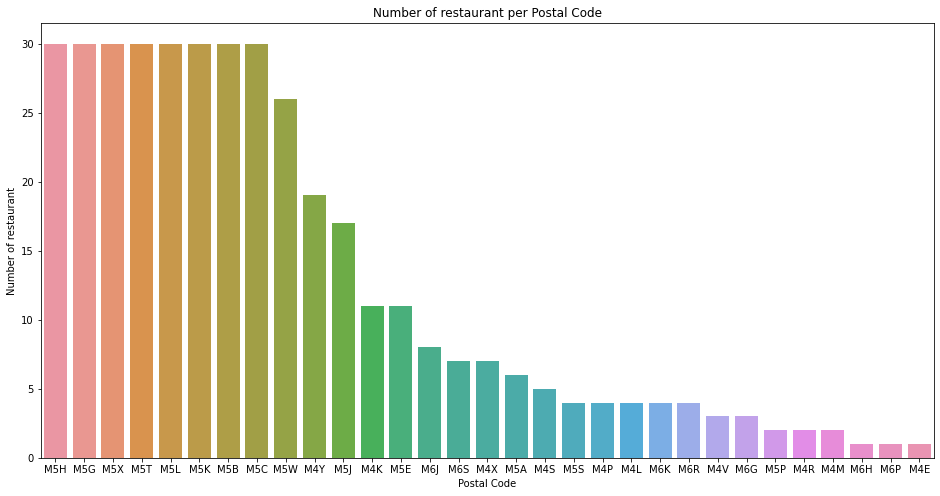

In [64]:
restaurants_df, grouped_restaurants = explore_venue('restaurant', explore_df)

In [65]:
restaurants_df.head()

,name,categories,id,lat,lng,Postcode,Borough
0,Seaspray Restaurant,Asian Restaurant,4dbc53541e72b351caafda72,43.678888,-79.298167,M4E,East Toronto
1,Herby Restaurant,Persian Restaurant,5e0555bdbf036000082018fd,43.677450,-79.351290,M4K,East Toronto
2,Osmow’s Authentic Mediterranean Restaurant,Mediterranean Restaurant,5bb8f09c20dc640025ca7259,43.677883,-79.349250,M4K,East Toronto
3,Beiteddine Lebanese Restaurant,Lebanese Restaurant,5d8653a66d03900008abeac2,43.678065,-79.348542,M4K,East Toronto
4,Megas Restaurant,Greek Restaurant,4b6e0665f964a5204ea42ce3,43.677692,-79.351522,M4K,East Toronto


In [68]:
grouped_restaurants.tail()

,Postcode,# restaurant
5,M4R,2
3,M4M,2
25,M6H,1
28,M6P,1
0,M4E,1


In [69]:
explore_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


Add the number of restaurants for each postcode

In [70]:
#List with the number of restaurants per postcode
n_restaurants = []
#List with the postcodes to merge
postcodes_to_merge = grouped_restaurants['Postcode'].values

for postcode in explore_df['Postcode']:
    if postcode not in postcodes_to_merge:
        n_restaurants.append(0)
    else:
        n_restaurants.append(grouped_restaurants[grouped_restaurants['Postcode']==postcode].iloc[0,-1])

In [71]:
explore_df['# Restaurants']=n_restaurants
explore_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,# Restaurants
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,11
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0


In [72]:
explore_df.shape

(39, 6)

Let's visualize each post code with the size of the visualization proportional to the number of restaurants

In [73]:
neigh_map = folium.Map(location=[explore_df['Latitude'][13], explore_df['Longitude'][13]], zoom_start=12) 

for lat, lng, postcode, n_restaurants in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode'],
                                             explore_df['# Restaurants']):
    folium.CircleMarker(
        [lat, lng],
        radius=n_restaurants,
        color='blue',
        popup=postcode,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(neigh_map)

# display map
neigh_map

#### Gyms

The number of venues of type fitness is 251


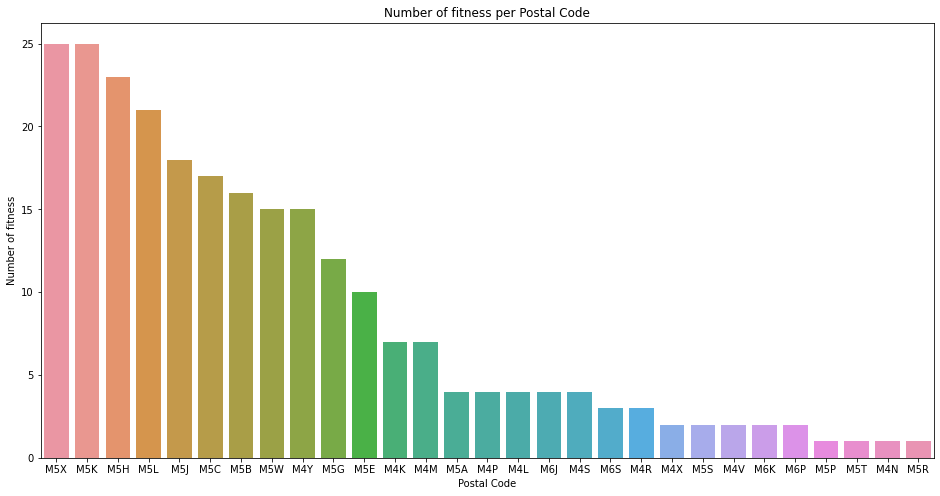

In [74]:
gyms_df, grouped_gyms = explore_venue('fitness', explore_df)

In [75]:
gyms_df

,name,categories,id,lat,lng,Postcode,Borough
0,Orangetheory Fitness,Gym / Fitness Center,586f1ff15e56b41e0a95f530,43.677457,-79.350947,M4K,East Toronto
1,GoodLife Fitness Toronto Danforth and Pape,Gym,4ade346bf964a520e77321e3,43.678545,-79.345305,M4K,East Toronto
2,Booty Camp Fitness,Gym / Fitness Center,4c51b9951c67ef3b6eea1bb9,43.679245,-79.353293,M4K,East Toronto
3,Risque Fitness,Gym / Fitness Center,515dbe5ce4b0003b395d2e6d,43.677447,-79.351344,M4K,East Toronto
4,Elements of Fitness,Gym / Fitness Center,4cef37077db3224b29932b2e,43.677260,-79.354294,M4K,East Toronto
...,...,...,...,...,...,...,...
246,Snap Fitness,Gym,4e77bdeeae60e5aeffebb7df,43.665485,-79.468708,M6P,West Toronto
247,RPM Total Fitness,Athletics & Sports,5165df47e4b0f2d566084004,43.665502,-79.468411,M6P,West Toronto
248,Think Fitness,Gym,4ba7867af964a520909a39e3,43.647966,-79.486462,M6S,West Toronto
249,Orangetheory Fitness Bloor West,Gym,5bfdd5dbdd12f8002c91ab80,43.648556,-79.486140,M6S,West Toronto


In [76]:
grouped_gyms.tail()

,Postcode,# fitness
27,M6P,2
19,M5P,1
22,M5T,1
3,M4N,1
20,M5R,1


Add the number of gyms to each postcode

In [77]:
#List with the number of gyms per postcode
n_gyms = []
#List with the postcodes to merge
gyms_to_merge = grouped_gyms['Postcode'].values

for postcode in explore_df['Postcode']:
    if postcode not in gyms_to_merge:
        n_gyms.append(0)
    else:
        n_gyms.append(grouped_gyms[grouped_gyms['Postcode']==postcode].iloc[0,-1])

In [78]:
explore_df['# Gyms'] = n_gyms

In [79]:
explore_df.shape

(39, 7)

In [80]:
explore_df.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,# Restaurants,# Gyms
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,0
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,11,7
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4,4
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2,7
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,1
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4,4
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,2,3
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,5,4
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0,0
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,3,2


Let's visualize each post code with the size of the visualization proportional to the number of gyms

In [81]:
neigh_map = folium.Map(location=[explore_df['Latitude'][13], explore_df['Longitude'][13]], zoom_start=12) 

for lat, lng, postcode, n_gyms in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode'],
                                             explore_df['# Gyms']):
    folium.CircleMarker(
        [lat, lng],
        radius=n_gyms,
        color='blue',
        popup=postcode,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(neigh_map)

# display map
neigh_map

#### Parks

The number of venues of type park is 576


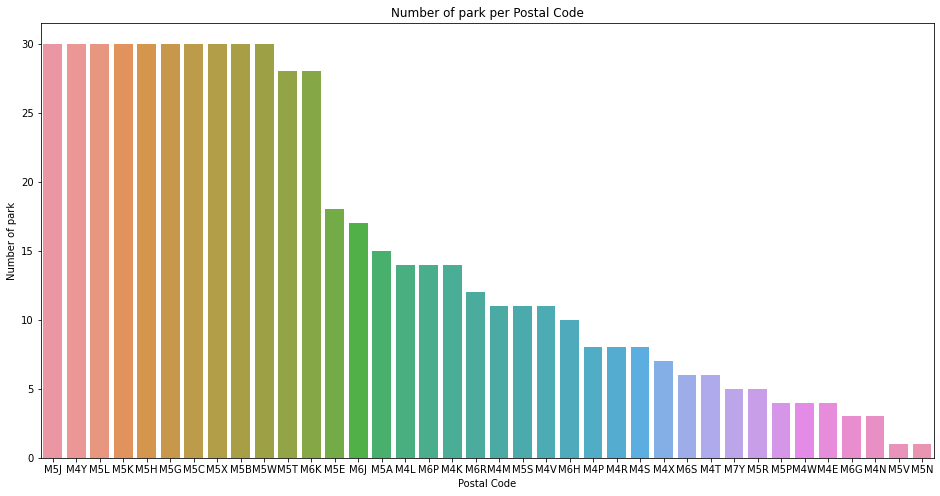

In [82]:
parks_df, grouped_parks = explore_venue('park', explore_df)

In [83]:
parks_df

,name,categories,id,lat,lng,Postcode,Borough
0,Glen Stewart Park,Park,4dbc8fe96a23e294ba3237bd,43.675278,-79.294647,M4E,East Toronto
1,glen manor park,Park,51e19355498e102728a023e2,43.673384,-79.294036,M4E,East Toronto
2,Small Park,Park,4fb19f6ce4b0b9253b201145,43.672308,-79.292782,M4E,East Toronto
3,department of parks and recreation beaches rec...,Recreation Center,533202d3498e5cfccb08b4e1,43.673656,-79.298073,M4E,East Toronto
4,Withrow Park Farmers' Market,Farmers Market,4c791399566db60cab88430e,43.676320,-79.347406,M4K,East Toronto
...,...,...,...,...,...,...,...
571,Park Place,None,4d9936a29079b1f7ea343e0a,43.662295,-79.326435,M7Y,East Toronto
572,Park discount,Convenience Store,4e08809f6284d9ee92db9158,43.666422,-79.316466,M7Y,East Toronto
573,Jonathan Ashbridge Park,Park,4d0cef321f6bf04d75707a31,43.664702,-79.319898,M7Y,East Toronto
574,Beach Skate Park,Skate Park,5d0529df2f88ea002376e55d,43.662479,-79.316075,M7Y,East Toronto


In [84]:
grouped_parks.tail()

,Postcode,# park
0,M4E,4
30,M6G,3
4,M4N,3
27,M5V,1
22,M5N,1


Add the number of parks to each postcode

In [85]:
#List with the number of parks per postcode
n_parks = []
#List with the postcodes to merge
parks_to_merge = grouped_parks['Postcode'].values

for postcode in explore_df['Postcode']:
    if postcode not in parks_to_merge:
        n_parks.append(0)
    else:
        n_parks.append(grouped_parks[grouped_parks['Postcode']==postcode].iloc[0,-1])

In [86]:
explore_df['# Parks'] = n_parks
explore_df.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,# Restaurants,# Gyms,# Parks
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,0,4
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,11,7,14
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4,4,14
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2,7,11
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,1,3
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4,4,8
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,2,3,8
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,5,4,8
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0,0,6
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,3,2,11


Let's visualize each postal code where it's radius is propotional to it's number of parks

In [87]:
neigh_map = folium.Map(location=[explore_df['Latitude'][13], explore_df['Longitude'][13]], zoom_start=12) 

for lat, lng, postcode, n_parks in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode'],
                                             explore_df['# Parks']):
    folium.CircleMarker(
        [lat, lng],
        radius=n_parks,
        color='blue',
        popup=postcode,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(neigh_map)

# display map
neigh_map

#### Markets

The number of venues of type market is 437


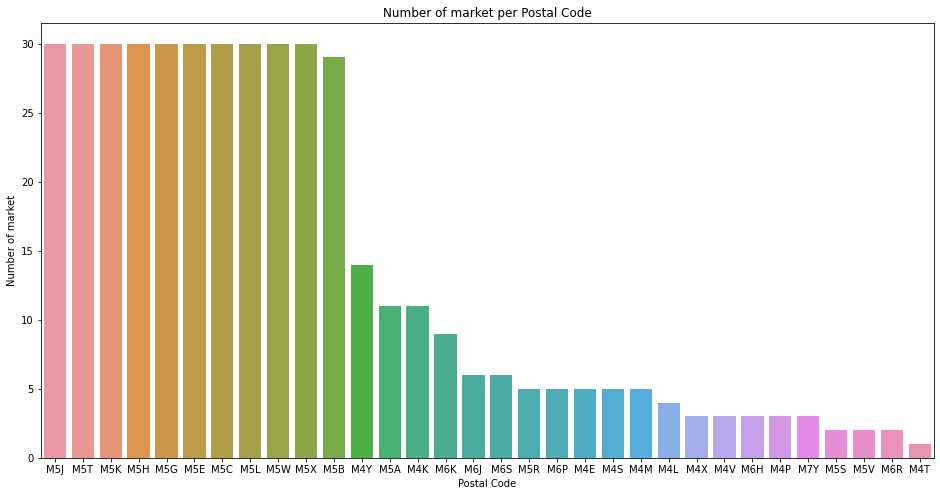

In [88]:
markets_df, grouped_markets = explore_venue('market', explore_df)

In [89]:
markets_df

,name,categories,id,lat,lng,Postcode,Borough
0,Beaches Wholesome Market,Health Food Store,4c547b89f5f3d13a5a2c3afa,43.672661,-79.287567,M4E,East Toronto
1,The Big Carrot Natural Food Market,Health Food Store,4ad4c062f964a52011f820e3,43.678879,-79.297734,M4E,East Toronto
2,The Big Carrot Natural Food Market,Grocery Store,5b82eb3501bc5a002ce55ebb,43.678730,-79.297478,M4E,East Toronto
3,Rowan Homespun Market,Market,55ac0cb1498e89610f1d76aa,43.672218,-79.289780,M4E,East Toronto
4,Frolic Fresh Flower Market,Flower Shop,4b8835d6f964a5209ce731e3,43.672714,-79.287987,M4E,East Toronto
...,...,...,...,...,...,...,...
432,Green Thumb Fruit Market,Grocery Store,4bb2144df964a5201cb73ce3,43.650776,-79.477933,M6S,West Toronto
433,John's Fruit Village,Grocery Store,4dc5bf76fa76d685cde99ed0,43.649931,-79.483052,M6S,West Toronto
434,Leslieville Farmers Market,Farmers Market,4deb8ba688774880e3387c0c,43.664901,-79.319784,M7Y,East Toronto
435,Loblaws,Grocery Store,4ad8ebb8f964a520fe1521e3,43.660996,-79.328334,M7Y,East Toronto


In [90]:
grouped_markets

,Postcode,# market
16,M5J,30
21,M5T,30
17,M5K,30
15,M5H,30
14,M5G,30
13,M5E,30
12,M5C,30
18,M5L,30
23,M5W,30
24,M5X,30


Add the number of markets to each postal code

In [91]:
#List with the number of markets per postcode
n_markets = []
#List with the postcodes to merge
markets_to_merge = grouped_markets['Postcode'].values

for postcode in explore_df['Postcode']:
    if postcode not in markets_to_merge:
        n_markets.append(0)
    else:
        n_markets.append(grouped_markets[grouped_markets['Postcode']==postcode].iloc[0,-1])

In [92]:
explore_df['# Markets'] = n_markets
explore_df.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,# Restaurants,# Gyms,# Parks,# Markets
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,0,4,5
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,11,7,14,11
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4,4,14,4
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2,7,11,5
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,1,3,0
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4,4,8,3
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,2,3,8,0
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,5,4,8,5
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0,0,6,1
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,3,2,11,3


In [93]:
explore_df.shape

(39, 9)

Visualize each postal code where the radius is proportional to the number of bars

In [94]:
neigh_map = folium.Map(location=[explore_df['Latitude'][13], explore_df['Longitude'][13]], zoom_start=12) 

for lat, lng, postcode, n_markets in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode'],
                                             explore_df['# Markets']):
    folium.CircleMarker(
        [lat, lng],
        radius=n_markets,
        color='blue',
        popup=postcode,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(neigh_map)

# display map
neigh_map

#### Schools

The number of venues of type school is 261


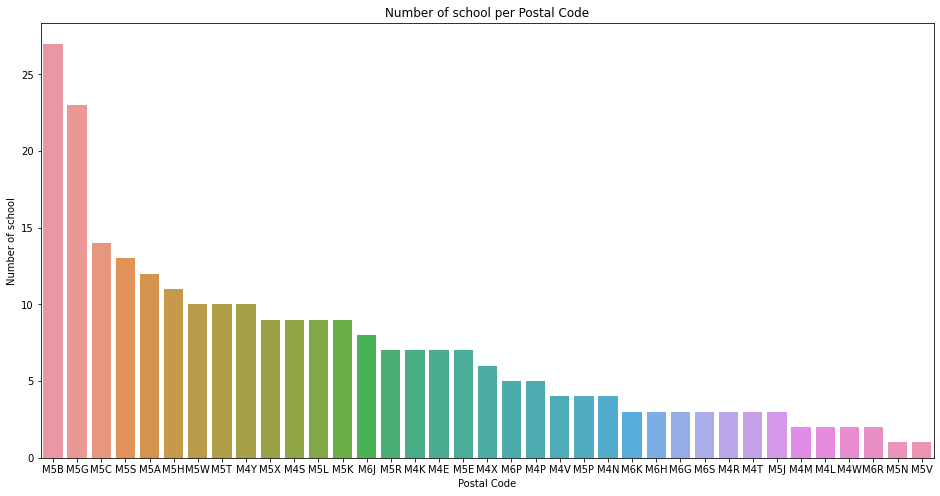

In [95]:
schools_df, grouped_schools = explore_venue('school', explore_df)

In [96]:
schools_df

,name,categories,id,lat,lng,Postcode,Borough
0,St.John Catholic School,School,4ce5c0e0d99f721e8ee69f73,43.680676,-79.294542,M4E,East Toronto
1,Balmy Beach School,School,4b2b8492f964a52012b724e3,43.676199,-79.290134,M4E,East Toronto
2,St. Denis Catholic School,School,4ccb146397d0224b440757b8,43.672881,-79.290056,M4E,East Toronto
3,Healthy Earth Bilingual Nursery School,School,4daee07f8154d1d4886f37bc,43.672365,-79.289526,M4E,East Toronto
4,Glen Ames Middle School,Middle School,4fd7e80be4b0dfef1527d04d,43.674155,-79.298477,M4E,East Toronto
...,...,...,...,...,...,...,...
256,Howard Public School,Elementary School,4b218898f964a5206a3d24e3,43.650511,-79.451976,M6R,West Toronto
257,Howard Public School Playground,Playground,50620852e4b02bec9b69b699,43.650740,-79.452020,M6R,West Toronto
258,St Pius X Catholic Elementary School,School,4d3ed4eafb4c54818b56e914,43.651261,-79.484689,M6S,West Toronto
259,Art Works Art School,School,4f60f577e4b0233fb2cbb3b0,43.655042,-79.486846,M6S,West Toronto


In [98]:
grouped_schools.head()

,Postcode,# school
14,M5B,27
17,M5G,23
15,M5C,14
25,M5S,13
13,M5A,12


Add the number of schools to each postal code

In [99]:
#List with the number of schools per postcode
n_schools = []
#List with the postcodes to merge
schools_to_merge = grouped_schools['Postcode'].values

for postcode in explore_df['Postcode']:
    if postcode not in schools_to_merge:
        n_schools.append(0)
    else:
        n_schools.append(grouped_schools[grouped_schools['Postcode']==postcode].iloc[0,-1])

In [100]:
explore_df['# Schools'] = n_schools
explore_df.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,# Restaurants,# Gyms,# Parks,# Markets,# Schools
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,0,4,5,7
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,11,7,14,11,7
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4,4,14,4,2
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2,7,11,5,2
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,1,3,0,4
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4,4,8,3,5
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,2,3,8,0,3
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,5,4,8,5,9
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0,0,6,1,3
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,3,2,11,3,4


Visualize each postal code where the radius is proportional to the number of schools

In [101]:
neigh_map = folium.Map(location=[explore_df['Latitude'][13], explore_df['Longitude'][13]], zoom_start=12) 

for lat, lng, postcode, n_schools in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode'],
                                             explore_df['# Schools']):
    folium.CircleMarker(
        [lat, lng],
        radius=n_schools,
        color='blue',
        popup=postcode,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(neigh_map)

# display map
neigh_map

#### Cafes

The number of venues of type cafe is 452


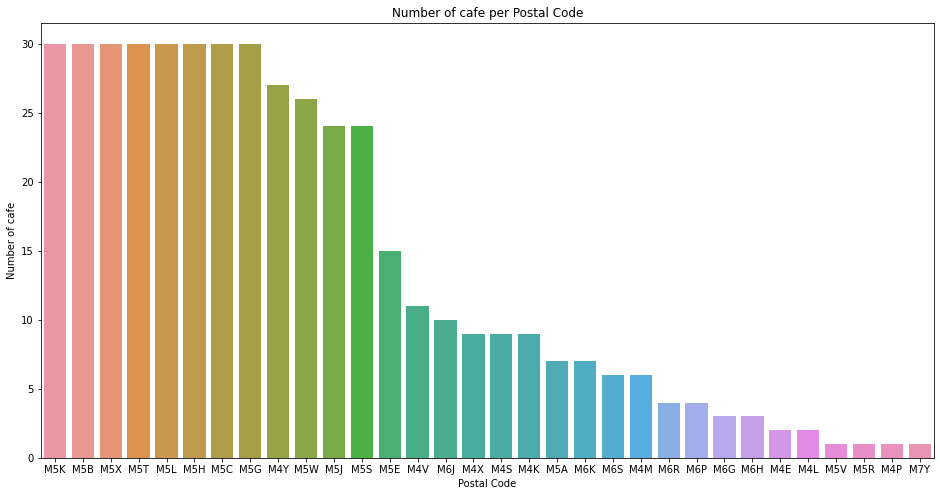

In [102]:
cafes_df, grouped_cafes = explore_venue('cafe', explore_df)

In [103]:
cafes_df

,name,categories,id,lat,lng,Postcode,Borough
0,Beacher Cafe,Breakfast Spot,4ae33773f964a520ca9121e3,43.671938,-79.291238,M4E,East Toronto
1,Beaches Bake Shop,Bakery,4c0e40c0c700c9b6e185a3dd,43.680363,-79.289692,M4E,East Toronto
2,Bread and Roses Bakery Cafe,Café,57cef7ff498e310e96cae571,43.677853,-79.348918,M4K,East Toronto
3,Vegetarian Cafe in the Big Carrot,Vegetarian / Vegan Restaurant,4feb68ece4b07864fce4d4e7,43.677874,-79.352939,M4K,East Toronto
4,Cafe Fiorentina,Italian Restaurant,4e3dbb5e45dd68e3273e03b7,43.677743,-79.350115,M4K,East Toronto
...,...,...,...,...,...,...,...
447,Olive Cafe and Grill,Greek Restaurant,4bc8678f15a7ef3bddf97ada,43.650240,-79.481260,M6S,West Toronto
448,Opera Cafe & Fine Pastry Boutique,Café,4e876fdc5c5cfd1dcc6664b1,43.650563,-79.479775,M6S,West Toronto
449,The Archtop Cafe,Café,585189cef7f8dd196f32bbf4,43.650513,-79.479750,M6S,West Toronto
450,Queen's Pasta Café,Italian Restaurant,4ad4c05ff964a52032f720e3,43.650707,-79.477978,M6S,West Toronto


In [105]:
grouped_cafes.head()

,Postcode,# cafe
16,M5K,30
10,M5B,30
23,M5X,30
20,M5T,30
17,M5L,30


Add the number of cafes to each postal code

In [106]:
#List with the number of cafes per postcode
n_cafes = []
#List with the postcodes to merge
cafes_to_merge = grouped_cafes['Postcode'].values

for postcode in explore_df['Postcode']:
    if postcode not in cafes_to_merge:
        n_cafes.append(0)
    else:
        n_cafes.append(grouped_cafes[grouped_cafes['Postcode']==postcode].iloc[0,-1])

In [107]:
explore_df['# Cafes'] = n_cafes
explore_df.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,# Restaurants,# Gyms,# Parks,# Markets,# Schools,# Cafes
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,0,4,5,7,2
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,11,7,14,11,7,9
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4,4,14,4,2,2
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2,7,11,5,2,6
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,1,3,0,4,0
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4,4,8,3,5,1
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,2,3,8,0,3,0
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,5,4,8,5,9,9
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0,0,6,1,3,0
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,3,2,11,3,4,11


Visualize each postal code where the radius is proportional to the number of cafes

In [108]:
neigh_map = folium.Map(location=[explore_df['Latitude'][13], explore_df['Longitude'][13]], zoom_start=12) 

for lat, lng, postcode, n_cafes in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode'],
                                             explore_df['# Cafes']):
    folium.CircleMarker(
        [lat, lng],
        radius=n_cafes,
        color='blue',
        popup=postcode,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(neigh_map)

# display map
neigh_map

### Clustering the neighbourhoods

In order to do the clustering one can only use the numerical attributes. In this case I'm gonna use the features which represent a frequency of venues to do the clustering. 

In [110]:
explore_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,# Restaurants,# Gyms,# Parks,# Markets,# Schools,# Cafes
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,0,4,5,7,2
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,11,7,14,11,7,9
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4,4,14,4,2,2
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2,7,11,5,2,6
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,1,3,0,4,0


In [111]:
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Postcode       39 non-null     object 
 1   Borough        39 non-null     object 
 2   Neighbourhood  39 non-null     object 
 3   Latitude       39 non-null     float64
 4   Longitude      39 non-null     float64
 5   # Restaurants  39 non-null     int64  
 6   # Gyms         39 non-null     int64  
 7   # Parks        39 non-null     int64  
 8   # Markets      39 non-null     int64  
 9   # Schools      39 non-null     int64  
 10  # Cafes        39 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 3.5+ KB


In [115]:
X = explore_df.iloc[:,5:11].values

In [118]:
X.shape

(39, 6)

Now let's normalize the dataset. I use **StandardScaler()** to normalize the dataset.

In [117]:
from sklearn.preprocessing import StandardScaler

clus_dataset = StandardScaler().fit_transform(X)

Now let's estimate the best k (number of clusters) using the elbow method.

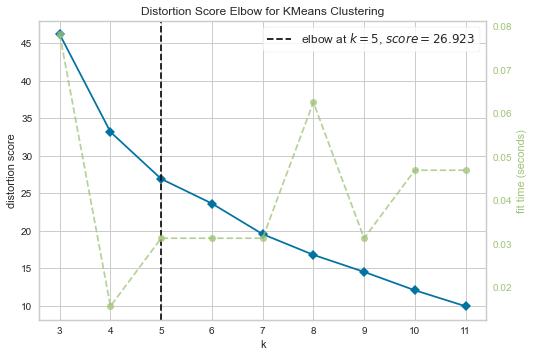

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
clus_model = KMeans()
visualizer = KElbowVisualizer(clus_model, k=(3,12))

visualizer.fit(clus_dataset)    #Fit the data to the visualizer
visualizer.show()   #Finalize and render the figure

Based on the elbow method I decided to use 5 seeds for clustering (k = 5)

In [120]:
k_means = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means.fit(clus_dataset)

KMeans(n_clusters=5, n_init=12)

In [121]:
k_means_labels = k_means.labels_

In [122]:
set(k_means_labels)

{0, 1, 2, 3, 4}

In [123]:
explore_df['Clusters']=k_means_labels

Add a column representing the total number of venues

In [142]:
total_venues = []

for row in range(0,explore_df.shape[0]):
    total = explore_df.iloc[row,5:11].sum()
    total_venues.append(total)
    

In [145]:
len(total_venues)


39

In [146]:
explore_df['Total Venues'] = total_venues

In [147]:
explore_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,# Restaurants,# Gyms,# Parks,# Markets,# Schools,# Cafes,Clusters,Total Venues
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,0,4,5,7,2,1,19
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,11,7,14,11,7,9,3,59
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4,4,14,4,2,2,1,30
3,M4M,East Toronto,Studio District,43.659526,-79.340923,2,7,11,5,2,6,1,33
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,1,3,0,4,0,1,8


List with cluster colors

In [127]:
#Declaring a list of colors
list_colors = ['red', 'blue', 'yellow', 'green', 'cyan', 'black','magenta'] 
  
#Initializing the value of the number of clusters 
n = len(set(k_means_labels))
  
colors = random.sample(list_colors, n)

In [128]:
colors

['green', 'red', 'yellow', 'black', 'cyan']

In [133]:
explore_df.shape

(39, 12)

Visualize the clusters where the radius of each one is proportional to the total number of venues.

In [150]:
venues_map = folium.Map(location=[explore_df['Latitude'][3], explore_df['Longitude'][3]], zoom_start=11) 

# add the clustered neighbourhoods
for lat, lng, postcode, cluster, total_venues in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode'], explore_df['Clusters'], explore_df['Total Venues']):
    folium.CircleMarker(
        [lat, lng],
        radius=total_venues/8,
        color = colors[cluster],
        popup=postcode,
        fill = True,
        fill_color=colors[cluster],
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Clearly the red and black clusters represent neighbourhoods with a small number of selected venues. 

In [167]:
explore_df[(explore_df['Clusters'] == 0).values + (explore_df['Clusters']==2).values + (explore_df['Clusters']==4).values].sort_values('Clusters')

,Postcode,Borough,Neighbourhood,Latitude,Longitude,# Restaurants,# Gyms,# Parks,# Markets,# Schools,# Cafes,Clusters,Total Venues
14,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,30,16,30,29,27,30,0,162
17,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,30,12,30,30,23,30,0,155
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,30,17,30,30,14,30,2,151
18,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,30,23,30,30,11,30,2,154
20,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,30,25,30,30,9,30,2,154
21,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,30,21,30,30,9,30,2,150
29,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,30,25,30,30,9,30,2,154
12,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,19,15,30,14,10,27,4,115
16,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,11,10,18,30,7,15,4,91
19,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,17,18,30,30,3,24,4,122


The green cluster has a high number of schools. Between the yellow and the cyan clusters, the yellow one has a higher number of restaurants and gyms and a lower number of cafes comparing between the two. 

Visualization with the radius proportional to the number of schools.

In [168]:
venues_map = folium.Map(location=[explore_df['Latitude'][3], explore_df['Longitude'][3]], zoom_start=11) 

# add the clustered neighbourhoods
for lat, lng, postcode, cluster, n_schools in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode'], explore_df['Clusters'], explore_df['# Schools']):
    folium.CircleMarker(
        [lat, lng],
        radius=n_schools,
        color = colors[cluster],
        popup=postcode,
        fill = True,
        fill_color=colors[cluster],
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

As expected the green cluster has a really high number of schools. 

Visualization with the radius proportional to the number of restaurants and gyms

In [170]:
venues_map = folium.Map(location=[explore_df['Latitude'][3], explore_df['Longitude'][3]], zoom_start=11) 

# add the clustered neighbourhoods
for lat, lng, postcode, cluster, n_restaurants, n_gyms in zip(explore_df['Latitude'], explore_df['Longitude'], explore_df['Postcode'], explore_df['Clusters'], explore_df['# Restaurants'], explore_df['# Gyms']):
    folium.CircleMarker(
        [lat, lng],
        radius=n_restaurants + n_gyms/2,
        color = colors[cluster],
        popup=postcode,
        fill = True,
        fill_color=colors[cluster],
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

The yellow clusters has a substantially higher number of restaurants and gyms in comparison to the blue label, as expected. 